In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('out.csv')

In [2]:
df[df['id'] == 9][['long','lat']].to_json(orient="values")

'[[55.9406768257,54.7252134515],[55.9406777957,54.7252168449],[55.9406803537,54.7252194922],[55.9406797485,54.7252239506],[55.9406806709,54.7252263544],[55.9406824367,54.7252295193],[55.9406841824,54.725232349],[55.9406843504,54.7252359429],[55.9406860765,54.7252384346],[55.9406878593,54.7252422241],[55.9406879518,54.7252441828],[55.9406913491,54.7252484712],[55.9406930713,54.7252512566],[55.9406948044,54.7252543593],[55.9406957715,54.725258021],[55.9406975454,54.7252620844],[55.9406976719,54.7252646862],[55.9406994104,54.7252680881],[55.9406995694,54.7252713409],[55.9407028578,54.7252745411],[55.9407045988,54.7252782413],[55.9407071294,54.7252823166],[55.9407080355,54.7252849665],[55.9407097634,54.7252886397],[55.9407107647,54.7252932243],[55.9407156373,54.7252986811],[55.9407173954,54.7253032829],[55.9407167986,54.7253064718],[55.9407200255,54.7253101671],[55.9407195335,54.7253152989],[55.9407235359,54.7253196337],[55.9407235359,54.7253196337],[55.9407237887,54.7253244697],[55.940725

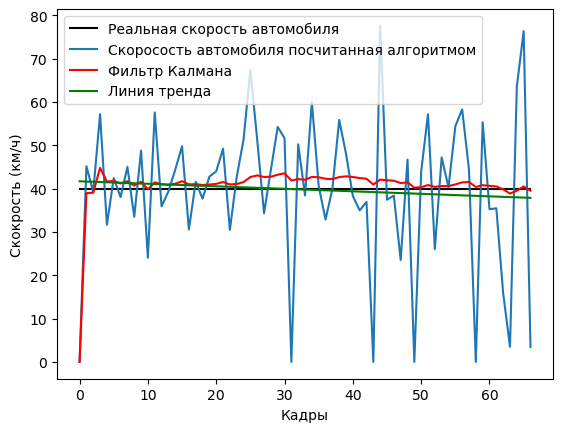

Real speed:  40
Raw mean:  39.80367301767654
Raw std:  17.332371036770944
Kalman mean:  40.781961521277275
Kalman std:  5.141908564822907


In [17]:
speed = np.array(df[df['id'] == 9]['speed'])
x = np.arange(len(speed))
trend = np.poly1d(np.polyfit(x, speed, 1))

# intial parameters---------------
n = len(speed)
sz = (n) # size of array
Q = 1e-4 # process variance
# allocate space for arrays
xhat = np.zeros(sz)      # a posteri estimate of x
P = np.zeros(sz)         # a posteri error estimate
xhatminus = np.zeros(sz) # a priori estimate of x
Pminus = np.zeros(sz)    # a priori error estimate
K = np.zeros(sz)         # Kalman gain
R = 0.4**2 # estimate of measurement variance
xhat[0] = 0.0
P[0] = 1.0

for i in range(1, n):

    xhatminus[i] = xhat[i-1]
    Pminus[i] = P[i-1] + Q

    K[i] = Pminus[i] / ( Pminus[i] + R )
    xhat[i] = xhatminus[i] + K[i] * (speed[i] - xhatminus[i])
    P[i] = (1 - K[i]) * Pminus[i]
#-------------------------------

plt.plot(x, np.linspace(40, 40, len(x)), 'black')
plt.plot(x, speed)
plt.plot(x, xhat, color='red')
plt.plot(x, trend(x), color='green')

plt.xlabel("Кадры")
plt.ylabel("Скокрость (км/ч)")
plt.legend(["Реальная скорость автомобиля", "Скоросость автомобиля посчитанная алгоритмом", "Фильтр Калмана","Линия тренда"])
plt.show()

print("Real speed: ", 40)
print("Raw mean: ", np.mean(speed))
print("Raw std: ", np.std(speed))
print("Kalman mean: ", np.mean(xhat))
print("Kalman std: ", np.std(xhat))

Считаем коэфциент корреляции между дву величинами

id
0     Axes(0.125,0.11;0.775x0.77)
1     Axes(0.125,0.11;0.775x0.77)
2     Axes(0.125,0.11;0.775x0.77)
3     Axes(0.125,0.11;0.775x0.77)
4     Axes(0.125,0.11;0.775x0.77)
5     Axes(0.125,0.11;0.775x0.77)
6     Axes(0.125,0.11;0.775x0.77)
7     Axes(0.125,0.11;0.775x0.77)
8     Axes(0.125,0.11;0.775x0.77)
9     Axes(0.125,0.11;0.775x0.77)
10    Axes(0.125,0.11;0.775x0.77)
11    Axes(0.125,0.11;0.775x0.77)
12    Axes(0.125,0.11;0.775x0.77)
13    Axes(0.125,0.11;0.775x0.77)
Name: speed, dtype: object

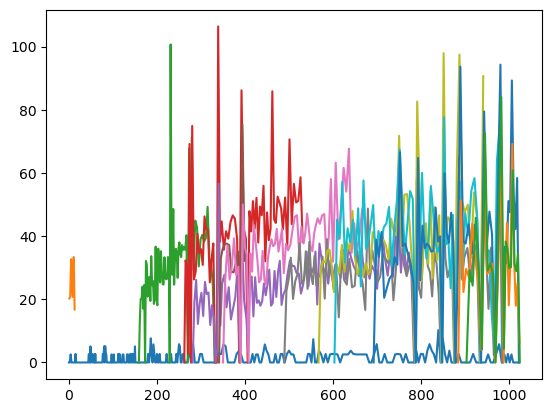

In [4]:
df.groupby(by=['id'])['speed'].plot()